In [74]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
import os
import json

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('notebook')
import matplotlib.pyplot as plt
from PIL import Image

For the subjects that have received enough classifications to retire
- what fraction of subjects pass a threshold to be confident in the consensus result? 
- Could you provide your ‘expert classification’ for a subset and compare your expert classification with the consensus result? 
    - How well does the consensus result match up with your expert classification? Any stats/info that you think can be helpful for me to show how well (or not well) our museum guests do would be helpful.
- What is the current retirement limit? Do you think that should be increased/decreased/stay the same based on the results so far? A

In [76]:
df = pd.read_csv('touch_table_subject_reductions_2019_10_15.csv')

In [77]:
df.head()

,id,reducer_key,workflow_id,subject_id,created_at,updated_at,subgroup,lock_version,reducible_id,reducible_type,data.0,data.1,data.2
0,31463358,T0_Stats,11308,30088075,2019-07-09 19:18:19 UTC,2019-10-07 15:16:01 UTC,_default,5,11308,Workflow,6.0,NaN,1.0
1,31463992,T0_Stats,11308,30087878,2019-07-09 19:24:31 UTC,2019-09-29 18:19:49 UTC,_default,10,11308,Workflow,6.0,4.0,1.0
2,31468444,T0_Stats,11308,30085221,2019-07-09 20:05:17 UTC,2019-10-15 20:03:51 UTC,_default,10,11308,Workflow,6.0,3.0,2.0
3,31468451,T0_Stats,11308,34084204,2019-07-09 20:05:23 UTC,2019-07-29 17:34:31 UTC,_default,7,11308,Workflow,NaN,5.0,3.0
4,31470164,T0_Stats,11308,30089260,2019-07-09 20:27:03 UTC,2019-09-21 20:06:28 UTC,_default,4,11308,Workflow,NaN,6.0,1.0


In [78]:
df = df.rename(columns={'id': 'extract_id_do_not_use', 'data.0': 'smooth', 'data.1': 'featured', 'data.2': 'artifact'})

In [79]:
df = df.fillna(0)

In [80]:
df['subject_id'] = df['subject_id'].astype(str)

In [81]:
df['total'] = df['smooth'] + df['featured'] + df['artifact']
for col in ['smooth', 'featured', 'artifact']:
    df[col + '_fraction'] = df[col] / df['total']

In [82]:
df.head()

,extract_id_do_not_use,reducer_key,workflow_id,subject_id,created_at,updated_at,subgroup,lock_version,reducible_id,reducible_type,smooth,featured,artifact,total,smooth_fraction,featured_fraction,artifact_fraction
0,31463358,T0_Stats,11308,30088075,2019-07-09 19:18:19 UTC,2019-10-07 15:16:01 UTC,_default,5,11308,Workflow,6.0,0.0,1.0,7.0,0.857143,0.000000,0.142857
1,31463992,T0_Stats,11308,30087878,2019-07-09 19:24:31 UTC,2019-09-29 18:19:49 UTC,_default,10,11308,Workflow,6.0,4.0,1.0,11.0,0.545455,0.363636,0.090909
2,31468444,T0_Stats,11308,30085221,2019-07-09 20:05:17 UTC,2019-10-15 20:03:51 UTC,_default,10,11308,Workflow,6.0,3.0,2.0,11.0,0.545455,0.272727,0.181818
3,31468451,T0_Stats,11308,34084204,2019-07-09 20:05:23 UTC,2019-07-29 17:34:31 UTC,_default,7,11308,Workflow,0.0,5.0,3.0,8.0,0.000000,0.625000,0.375000
4,31470164,T0_Stats,11308,30089260,2019-07-09 20:27:03 UTC,2019-09-21 20:06:28 UTC,_default,4,11308,Workflow,0.0,6.0,1.0,7.0,0.000000,0.857143,0.142857


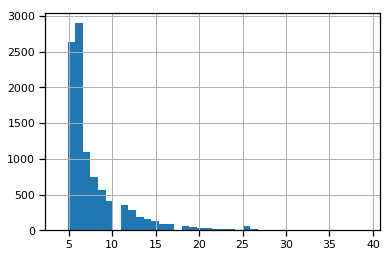

In [83]:
df.query('total < 40')['total'].hist(bins=40)

In [84]:
df10 = df.query('total >= 10')
len(df10)

2053

Text(0,0.5,'Galaxies')

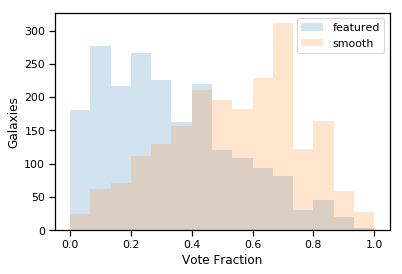

In [85]:
alpha = 0.2
plt.hist(df10['featured_fraction'], bins=15, alpha=alpha, label='featured')
plt.hist(df10['smooth_fraction'], bins=15, alpha=alpha, label='smooth')
# plt.hist(df['artifact_fraction'], bins=10, alpha=alpha, label='artifact')
plt.legend()
plt.xlabel('Vote Fraction')
plt.ylabel('Galaxies')

(array([3998., 2357., 1817.,  701.,  551.,  382.,   97.,   32.,   52.,
          13.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

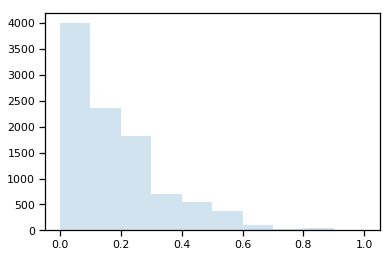

In [86]:
plt.hist(df['artifact_fraction'], bins=10, alpha=alpha, label='artifact')

In [87]:
cdf = pd.read_csv('u-scientist-touch-table-classifications.csv')

In [88]:
cdf.head()

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids
0,173727869,not-logged-in-c8b1ac78344c956f82d3,NaN,c8b1ac78344c956f82d3,11308,U!Scientist (Touch Table),5.11,2019-07-09 19:18:18 UTC,NaN,NaN,"{""started_at"":""2019-07-09T19:18:14.236Z"",""user...","[{""task"":""T0"",""task_label"":""What type of galax...","{""30088075"":{""retired"":null,""!ra"":316.71045821...",30088075
1,173727898,not-logged-in-c8b1ac78344c956f82d3,NaN,c8b1ac78344c956f82d3,11308,U!Scientist (Touch Table),5.11,2019-07-09 19:18:27 UTC,NaN,NaN,"{""started_at"":""2019-07-09T19:18:24.798Z"",""user...","[{""task"":""T0"",""task_label"":""What type of galax...","{""30088075"":{""retired"":null,""!ra"":316.71045821...",30088075
2,173728764,not-logged-in-c8b1ac78344c956f82d3,NaN,c8b1ac78344c956f82d3,11308,U!Scientist (Touch Table),5.11,2019-07-09 19:24:29 UTC,NaN,NaN,"{""started_at"":""2019-07-09T19:24:24.066Z"",""user...","[{""task"":""T0"",""task_label"":""What type of galax...","{""30087878"":{""retired"":null,""!ra"":314.13474389...",30087878
3,173736556,not-logged-in-c8b1ac78344c956f82d3,NaN,c8b1ac78344c956f82d3,11308,U!Scientist (Touch Table),5.11,2019-07-09 20:05:16 UTC,NaN,NaN,"{""started_at"":""2019-07-09T20:04:46.417Z"",""user...","[{""task"":""T0"",""task_label"":""What type of galax...","{""30085221"":{""retired"":null,""!ra"":255.87632605...",30085221
4,173736577,not-logged-in-c8b1ac78344c956f82d3,NaN,c8b1ac78344c956f82d3,11308,U!Scientist (Touch Table),5.11,2019-07-09 20:05:22 UTC,NaN,NaN,"{""started_at"":""2019-07-09T20:05:19.463Z"",""user...","[{""task"":""T0"",""task_label"":""What type of galax...","{""34084204"":{""retired"":null,""!ra"":247.71105430...",34084204


In [89]:
subject_data =  [json.loads(x) for x in cdf['subject_data'].unique()]

In [90]:
subject_data[0]

{'30088075': {'retired': None,
  '!ra': 316.7104582163858,
  '!dec': -5.659041718676042,
  '!mag_g': 17.77003675699234,
  '!mag_i': 16.57677471637726,
  '!mag_r': 16.93778097629547,
  '!mag_u': 19.49950337409973,
  '!mag_z': 16.296133399009705,
  '!nsa_id': 102865,
  '!iauname': 'J210650.51-053932.6',
  '!redshift': 0.05730503797531128,
  '!mag_abs_r': -19.40909194946289,
  '!mag_faruv': 22.782754134386778,
  '!petroflux': 114.4543685913086,
  '!petroth50': 1.586470603942871,
  '!mag_nearuv': -999.0,
  '!petrotheta': 4.047774791717529,
  '!nsa_version': '1_0_0',
  '!sdss_search': '[Click to view in SDSS](+tab+http://skyserver.sdss.org/dr14/en/tools/chart/navi.aspx?ra=316.7104582163858&dec=-5.659041718676042&scale=0.1&width=120&height=120&opt=)',
  '#upload_date': '2019-02-06',
  '!absolute_size': 4.54248678802766,
  '!decals_search': '[Click to view in DECALS](+tab+http://www.legacysurvey.org/viewer?ra=316.7104582163858&dec=-5.659041718676042&zoom=15&layer=decals-dr5)',
  '!simbad_sear

In [91]:
def flatten_subject(subject):
    subject_id = list(subject.keys())[0]
    subject_data = subject[subject_id]
    subject_data.update({'subject_id': subject_id})
    return subject_data.copy()

In [92]:
flatten_subject(subject_data[0])

{'retired': None,
 '!ra': 316.7104582163858,
 '!dec': -5.659041718676042,
 '!mag_g': 17.77003675699234,
 '!mag_i': 16.57677471637726,
 '!mag_r': 16.93778097629547,
 '!mag_u': 19.49950337409973,
 '!mag_z': 16.296133399009705,
 '!nsa_id': 102865,
 '!iauname': 'J210650.51-053932.6',
 '!redshift': 0.05730503797531128,
 '!mag_abs_r': -19.40909194946289,
 '!mag_faruv': 22.782754134386778,
 '!petroflux': 114.4543685913086,
 '!petroth50': 1.586470603942871,
 '!mag_nearuv': -999.0,
 '!petrotheta': 4.047774791717529,
 '!nsa_version': '1_0_0',
 '!sdss_search': '[Click to view in SDSS](+tab+http://skyserver.sdss.org/dr14/en/tools/chart/navi.aspx?ra=316.7104582163858&dec=-5.659041718676042&scale=0.1&width=120&height=120&opt=)',
 '#upload_date': '2019-02-06',
 '!absolute_size': 4.54248678802766,
 '!decals_search': '[Click to view in DECALS](+tab+http://www.legacysurvey.org/viewer?ra=316.7104582163858&dec=-5.659041718676042&zoom=15&layer=decals-dr5)',
 '!simbad_search': '[Click to search SIMBAD](+tab

In [93]:
subject_data_flat = [flatten_subject(subject) for subject in subject_data]

In [94]:
subject_df = pd.DataFrame(data=subject_data_flat)

In [95]:
subject_df.head()

,retired,!ra,!dec,!mag_g,!mag_i,!mag_r,!mag_u,!mag_z,!nsa_id,!iauname,...,!simbad_search,!vizier_search,!nasa_ned_search,metadata_message,subject_id,!file_loc,#uploader,!petroth90,#retirement_limit,!panstarrs_dr1_search
0,None,316.710458,-5.659042,17.770037,16.576775,16.937781,19.499503,16.296133,102865,J210650.51-053932.6,...,[Click to search SIMBAD](+tab+http://simbad.u-...,[Click to search VizieR](+tab+http://vizier.u-...,[Click to search NASA NED](+tab+https://ned.ip...,Metadata is available in [Talk](+tab+https://w...,30088075,NaN,NaN,NaN,NaN,NaN
1,None,314.134744,-0.569869,17.199897,16.059467,16.491730,18.459820,15.862835,189122,J205632.33-003411.4,...,[Click to search SIMBAD](+tab+http://simbad.u-...,[Click to search VizieR](+tab+http://vizier.u-...,[Click to search NASA NED](+tab+https://ned.ip...,Metadata is available in [Talk](+tab+https://w...,30087878,NaN,NaN,NaN,NaN,NaN
2,None,255.876326,24.058582,17.199978,15.870711,16.333262,18.835032,15.550009,343675,J170330.33+240330.9,...,[Click to search SIMBAD](+tab+http://simbad.u-...,[Click to search VizieR](+tab+http://vizier.u-...,[Click to search NASA NED](+tab+https://ned.ip...,Metadata is available in [Talk](+tab+https://w...,30085221,NaN,NaN,NaN,NaN,NaN
3,None,247.711054,9.003237,NaN,NaN,NaN,NaN,NaN,529811,J163050.64+090011.6,...,[Click to search SIMBAD](+tab+http://simbad.u-...,[Click to search VizieR](+tab+http://vizier.u-...,[Click to search NASA NED](+tab+https://ned.ip...,Metadata is available in [Talk](+tab+https://w...,34084204,/Volumes/alpha/decals/png_native/dr5/J163/J163...,panoptes_oracle,17.658121,40.0,[Click to view in PANSTARRS DR1](+tab+http://p...
4,None,333.126929,7.272327,16.637574,15.945029,16.202714,17.397260,15.819719,589216,J221230.46+071620.4,...,[Click to search SIMBAD](+tab+http://simbad.u-...,[Click to search VizieR](+tab+http://vizier.u-...,[Click to search NASA NED](+tab+https://ned.ip...,Metadata is available in [Talk](+tab+https://w...,30089260,NaN,NaN,NaN,NaN,NaN


In [96]:
subject_df.columns.values

array(['retired', '!ra', '!dec', '!mag_g', '!mag_i', '!mag_r', '!mag_u',
       '!mag_z', '!nsa_id', '!iauname', '!redshift', '!mag_abs_r',
       '!mag_faruv', '!petroflux', '!petroth50', '!mag_nearuv',
       '!petrotheta', '!nsa_version', '!sdss_search', '#upload_date',
       '!absolute_size', '!decals_search', '!simbad_search',
       '!vizier_search', '!nasa_ned_search', 'metadata_message',
       'subject_id', '!file_loc', '#uploader', '!petroth90',
       '#retirement_limit', '!panstarrs_dr1_search'], dtype=object)

In [97]:
subject_df['!file_loc']

0                                                     NaN
1                                                     NaN
2                                                     NaN
3       /Volumes/alpha/decals/png_native/dr5/J163/J163...
4                                                     NaN
                              ...                        
9995    /Volumes/alpha/decals/png_native/dr5/J164/J164...
9996    /Volumes/alpha/decals/png_native/dr5/J163/J163...
9997    /Volumes/alpha/decals/png_native/dr5/J163/J163...
9998                                                  NaN
9999    /Volumes/alpha/decals/png_native/dr5/J163/J163...
Name: !file_loc, Length: 10000, dtype: object

In [98]:
subject_df['!file_loc'].value_counts()

/Volumes/alpha/decals/png_native/dr5/J163/J163945.44+234817.3.png    1
/Volumes/alpha/decals/png_native/dr5/J163/J163748.43+114732.8.png    1
/Volumes/alpha/decals/png_native/dr5/J163/J163315.65+130617.8.png    1
/Volumes/alpha/decals/png_native/dr5/J163/J163039.99+243727.8.png    1
/Volumes/alpha/decals/png_native/dr5/J163/J163924.01+261436.4.png    1
                                                                    ..
/Volumes/alpha/decals/png_native/dr5/J164/J164047.76+234431.4.png    1
/Volumes/alpha/decals/png_native/dr5/J163/J163238.99+152413.7.png    1
/Volumes/alpha/decals/png_native/dr5/J163/J163314.91+171510.2.png    1
/Volumes/alpha/decals/png_native/dr5/J163/J163003.20+260337.0.png    1
/Volumes/alpha/decals/png_native/dr5/J163/J163312.92+202818.8.png    1
Name: !file_loc, Length: 5000, dtype: int64

In [99]:
subject_df['subject_id']

0       30088075
1       30087878
2       30085221
3       34084204
4       30089260
          ...   
9995    34079029
9996    34081711
9997    34084202
9998    30089057
9999    34081131
Name: subject_id, Length: 10000, dtype: object

In [100]:
subject_df_mini = subject_df[['!file_loc', '!ra', '!dec', 'subject_id']]

In [101]:
master_df = pd.merge(df, subject_df_mini, on='subject_id', how='inner')
assert len(df) == len(master_df)

In [103]:
master_df.iloc[-1]

extract_id_do_not_use                                             34553463
reducer_key                                                       T0_Stats
workflow_id                                                          11308
subject_id                                                        34081131
created_at                                         2019-08-08 19:59:18 UTC
updated_at                                         2019-10-14 14:44:26 UTC
subgroup                                                          _default
lock_version                                                             4
reducible_id                                                         11308
reducible_type                                                    Workflow
smooth                                                                   4
featured                                                                 1
artifact                                                                 0
total                    

In [ ]:

def get_galaxy(loc):
    

In [115]:
def quality_check(df, retirement_limit, n_bins=10):
    df = df.query('total >= {}'.format(retirement_limit))
    print('Retired: {}'.format(len(df)))
    df = df.dropna(subset=['!file_loc'])
    df['local_file_loc'] = df['!file_loc'].astype(str).apply(lambda x: '/media' + x[8:])
    df['binned_vf'] = pd.cut(df['featured'], n_bins, labels=False)
    n_galaxies_per_bin = 5
    fig, axes = plt.subplots(n_bins, n_galaxies_per_bin, figsize=(n_bins, n_galaxies_per_bin))
    for bin_n in range(n_bins):
        selected_df = df.query('binned_vf == {}'.format(bin_n))
        assert len(selected_df) > n_galaxies_per_bin
        for galaxy_n in range(n_galaxies_per_bin):
            galaxy = selected_df.iloc[galaxy_n]
            image = Image.open(galaxy['local_file_loc'])
            axes[bin_n][galaxy_n].imshow(image)

Retired: 2053


FileNotFoundError: [Errno 2] No such file or directory: '/media/alpha/decals/png_native/dr5/J163/J163735.45+265046.7.png'

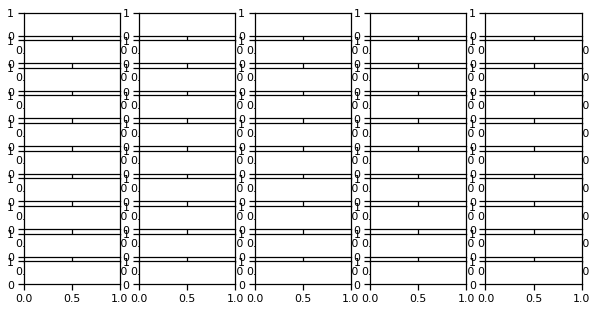

In [116]:
quality_check(master_df, retirement_limit=10)